In [21]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

# Load your dataset
df_alz = pd.read_csv("../alzheimers_disease_data.csv")

# Drop the 'DoctorIncharge' column
df_alz = df_alz.drop(["DoctorInCharge", "PatientID"], axis=1)  # Pass column names as a list

# Verify the column has been removed
df_alz.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

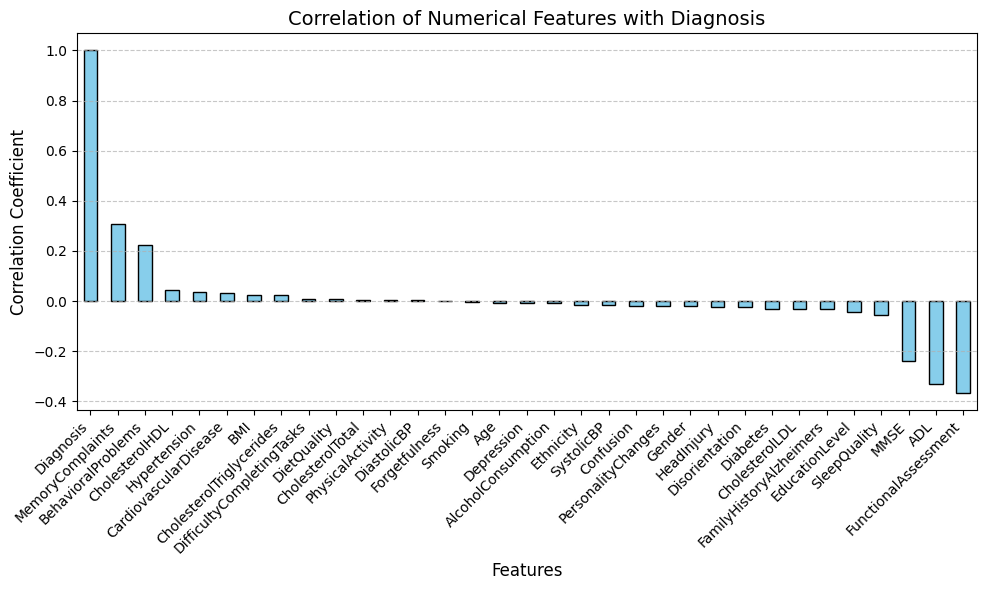

In [23]:
#Correlation (For Numerical Features)
#For numerical features and a categorical label (like diagnosis),
#calculate the correlation or use statistical tests like ANOVA.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_alz is your DataFrame and 'diagnosis' is your label
numerical_features = df_alz.select_dtypes(include=["float64", "int64"]).columns
correlation = df_alz[numerical_features].corrwith(df_alz["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

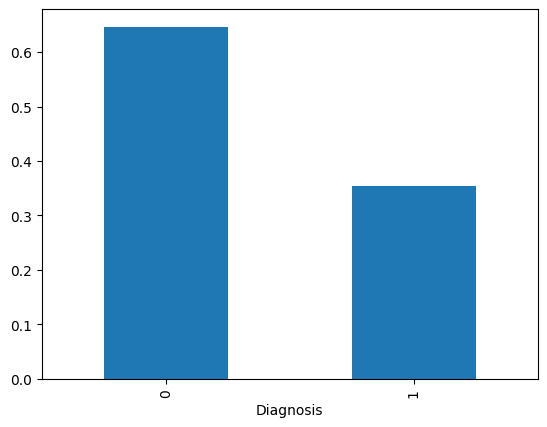

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


In [25]:
df_alz['Diagnosis'].value_counts(normalize=True)
# 0=No, 1=Yes

# Check imbalance
df_alz['Diagnosis'].value_counts(normalize=True).plot(kind='bar')
plt.show()

print(df_alz['Diagnosis'].value_counts(normalize=True))

#Focus on diagnosis of having alzheimer, so using undersampling to remove extra no alzheimer row data

In [27]:
#Extract the selected features from dataset
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'MemoryComplaints', 'BehavioralProblems'
]

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


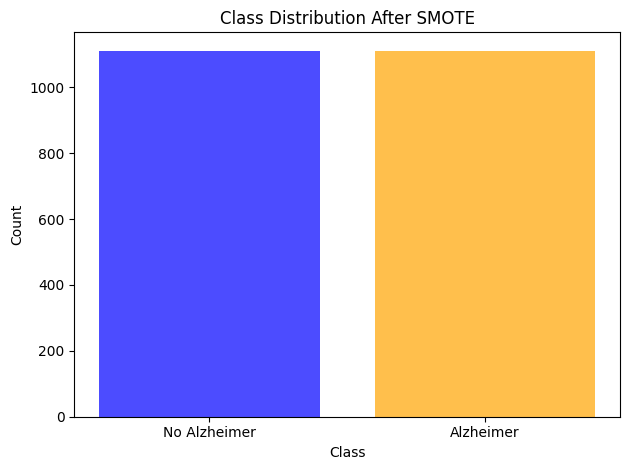

In [29]:
#result on accuracy, precision, f1score decreased means correct classification on alzheimer case REDUCE.
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE  # Import SMOTE here


# Define features and target
X = df_alz[selected_features]
y = df_alz['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Plot the class distribution after SMOTE
unique, counts = np.unique(y_train_smote, return_counts=True)
plt.bar(unique, counts, color=['blue', 'orange'], alpha=0.7)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Alzheimer', 'Alzheimer'])
plt.tight_layout()
plt.show()

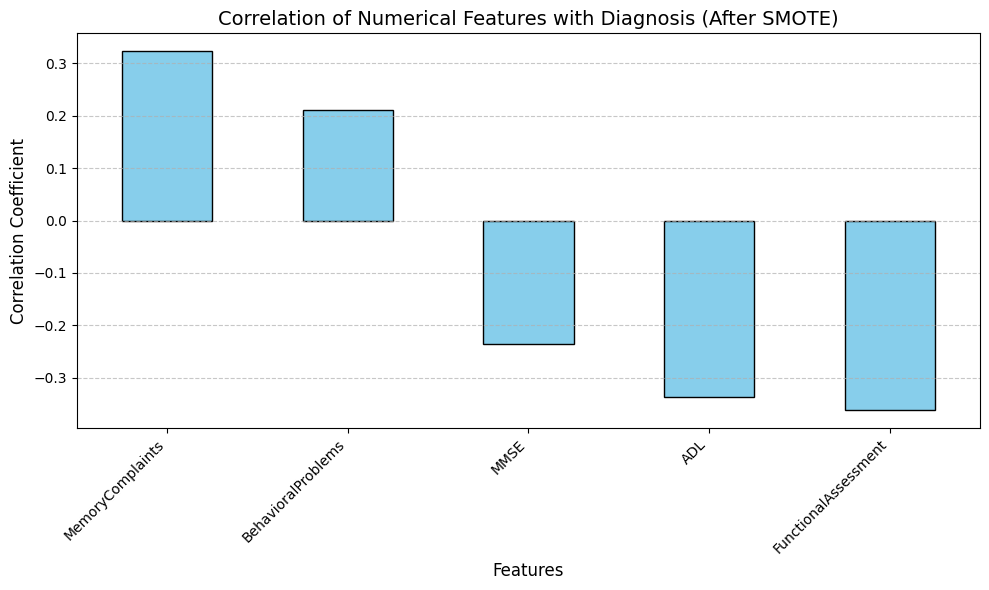

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming you already have X_train_smote and y_train_smote after applying SMOTE

# Combine the resampled features and target into a DataFrame
X_train_df = pd.DataFrame(X_train, columns=selected_features)
y_train_df = pd.Series(y_train, name="Diagnosis")

# Create a combined DataFrame for correlation analysis
df_smote = pd.concat([X_train_df, y_train_df], axis=1)

# Compute the correlation of numerical features with the diagnosis label
numerical_features = X_train_df.columns
correlation = df_smote[numerical_features].corrwith(df_smote["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis (After SMOTE)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assuming 'y' is the target variable
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) #Use 0.2 as test because accuracy is higher
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

#Accuracy: Proportion of correctly classified instances.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#From 0.94 decreased to 0.92 (SMOTE)

Accuracy: 0.9232558139534883


In [33]:
#Precision: Proportion of positive predictions that are actually correct.
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
#From 0.9266 decreased to 0.869

Precision: 0.8695652173913043


In [35]:
#F1-Score: Harmonic mean of Precision and Recall. It's useful when you need a balance between Precision and Recall.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")
#From 0.92 decreased to 0.894

F1-Score: 0.8945686900958466


ROC AUC: 0.937145020825445


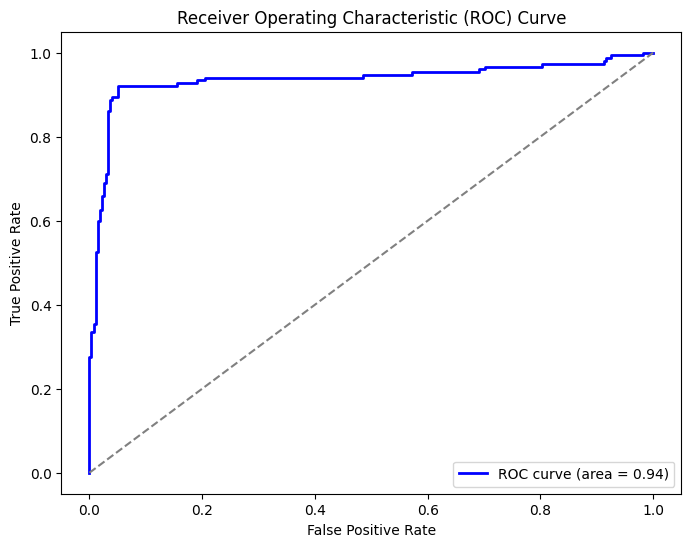

In [37]:
#ROC Curve and AUC (Area Under the Curve): Measures the performance of a binary classification model at all classification thresholds.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#Area 0.95 decreased to 0.937

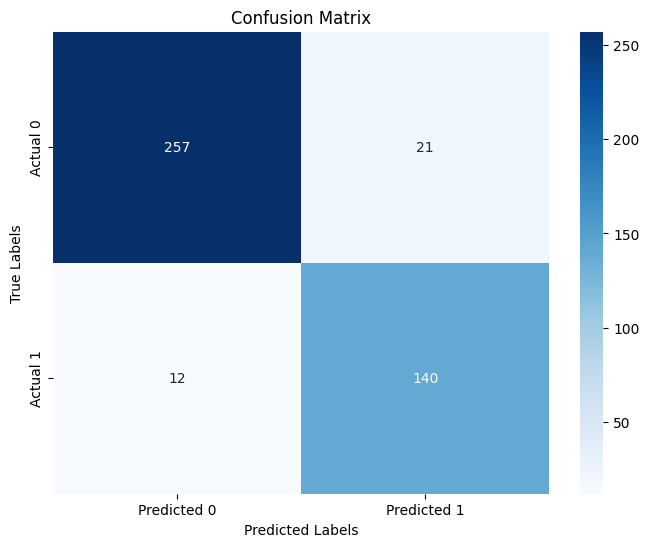

<Figure size 640x480 with 0 Axes>

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix_Supervise_SMOTE.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed